# Plots

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from helper import *
%matplotlib inline

In [54]:
def plotFile(filename, i, maxElements=None):
    data = np.array(readFromFile(filename))
    #
    #plt.figure()
    
    plt.subplot(3, 2, i + 1)
    if maxElements is not None:
        dataToPlot = data[:maxElements]
    else:
        dataToPlot = data
        
    plt.plot(np.arange(len(dataToPlot)), dataToPlot, )
    plt.ylim([0, 200])
    return data

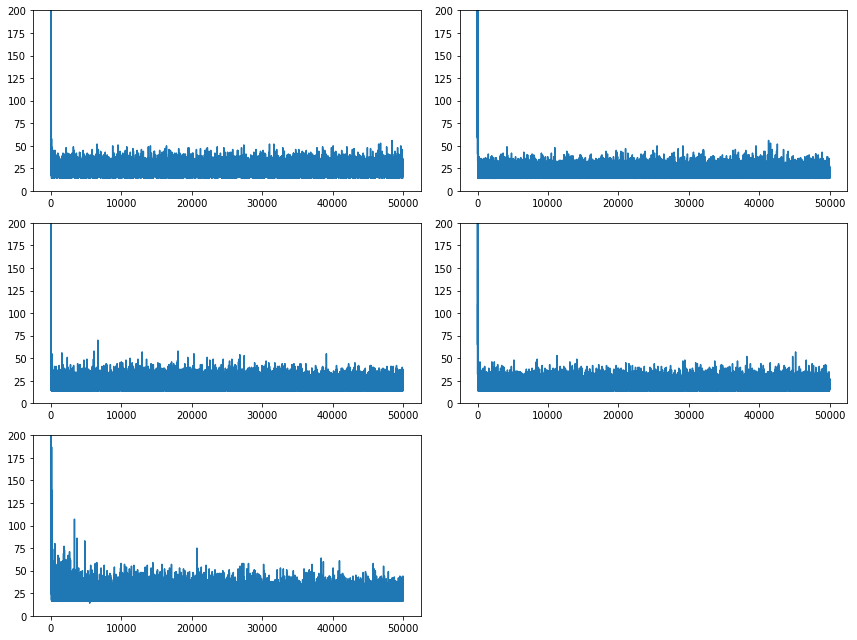

In [55]:
plt.figure(figsize=(12, 9))
numberOfSteps = plotFile("results/numberOfSteps_Q-Learning.json", 0)
numberOfSteps = plotFile("results/numberOfSteps_SARSA.json", 1)
numberOfSteps = plotFile("results/numberOfSteps_Actor-Critic.json", 2)
numberOfSteps = plotFile("results/numberOfSteps_QV-Learning.json", 3)
numberOfSteps = plotFile("results/numberOfSteps_ACLA.json", 4)
plt.tight_layout()

In [93]:
rewards = np.array(readFromFile("results/allRewardsIntakes_Q-Learning.json"))
len(rewards)
rewards[2499:-2500:2500].sum() / 20
91.1 / 20

4.555

In [34]:
numberOfSteps.min()

14.0

In [81]:
allRewardsIntakes = plotFile("allRewardsIntakes_QLearning.json")

TypeError: plotFile() missing 1 required positional argument: 'i'

# Experiment 1 : Single algo analysis

In [33]:
data = readComplexJson("resultsSingleAlgorithm.json")

In [58]:
algorithms = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA"]
finalRes = {algo: {"mean": 0, "std": 0} for algo in algorithms}
cumulRes = {algo: {"mean": 0, "std": 0} for algo in algorithms}

res = {algo: {"final": 0, "cumul": 0} for algo in algorithms}

for algo in algorithms:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    res[algo]["final"] = "%.2f +- %.2f" % (np.mean(final), np.std(final))
    res[algo]["cumul"] = "%.2f +- %.2f" % (np.mean(cumul), np.std(cumul))

print(json.dumps(res, indent=3))

{
   "Q-Learning": {
      "final": "4.83 +- 0.17",
      "cumul": "96.99 +- 5.86"
   },
   "SARSA": {
      "final": "4.84 +- 0.18",
      "cumul": "97.27 +- 6.04"
   },
   "Actor-Critic": {
      "final": "4.86 +- 0.12",
      "cumul": "96.92 +- 5.47"
   },
   "QV-Learning": {
      "final": "4.85 +- 0.13",
      "cumul": "97.12 +- 5.48"
   },
   "ACLA": {
      "final": "4.75 +- 0.42",
      "cumul": "90.99 +- 10.60"
   }
}
